In [18]:
%pip install plotly

     |████████████████████████████████| 12.9 MB 205 kB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=423c169de0ea949726576ff43a397a927863806f86e8ff2fd9b56a97c7c6ff53
  Stored in directory: /home/chethan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

In [2]:
data = pd.read_csv("Evaluation-Gem5-Sheet1.csv")

In [11]:
data

,Attributes,1K-DDR,1K-PIM,1M-DDR,1M-PIM,8M-DDR,8M-PIM
0,system.cpu.icache.overall_accesses::total,1275995,25749,334892729,977344,NaN,NaN
1,system.cpu.dcache.overall_accesses::total,457214,8837,128565629,273632,NaN,NaN
2,system.l2.overall_accesses::total,1093,999,9039,5731,NaN,NaN
3,system.l2.overall_miss_latency::total,101870000,142004000,316481000,790122000,NaN,NaN
4,system.membus.reqLayer0.occupancy,1089000,9980,3494000,55640,2360000.0,15460.0
5,system.membus.respLayer0.occupancy,5814000,49900,18502750,278200,NaN,NaN
6,system.cpu.numCycles,3571571,214023,927371890,3311601,NaN,NaN


In [4]:
print((list(data["Attributes"])))

['system.cpu.icache.overall_accesses::total', 'system.cpu.dcache.overall_accesses::total ', 'system.l2.overall_accesses::total', 'system.l2.overall_miss_latency::total', 'system.membus.reqLayer0.occupancy', 'system.membus.respLayer0.occupancy', 'system.cpu.numCycles']


In [5]:
attr = list(data["Attributes"])
ddr_1k = list(data["1K-DDR"])
pim_1k = list(data["1K-PIM"])
ddr_1m = list(data["1M-DDR"])
pim_1m = list(data["1M-PIM"])

In [12]:
ddr_list = []
pim_list = []
ddr_list.append(data['1K-DDR'][2])
ddr_list.append(data['1M-DDR'][2])
pim_list.append(data['1K-PIM'][2])
pim_list.append(data['1M-PIM'][2])

In [13]:
fig = plt.figure(figsize = (3, 5))

<Figure size 216x360 with 0 Axes>

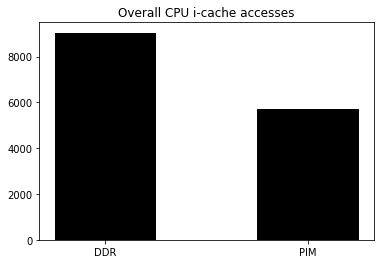

In [28]:
#BAR GRAPHS
plt.bar(["DDR","PIM"], [ddr_1m[2],pim_1m[2]], color ='black', width = 0.5)
plt.xticks([0,1])
plt.title("Overall CPU i-cache accesses") 
plt.show()

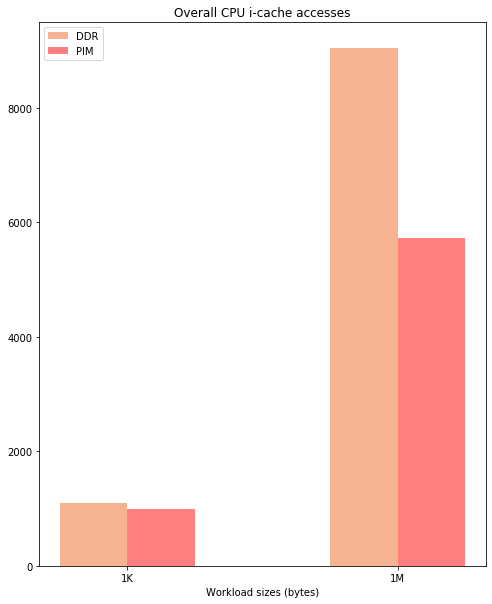

In [35]:
#GROUPED BAR GRAPHS
pos = list(range(2)) 
width = 0.25 
    
fig, ax = plt.subplots(figsize=(8,10))

plt.bar(pos, ddr_list, width, alpha=0.5, color='#EC6927') 
plt.bar([p + width for p in pos], pim_list, width, alpha=0.5, color='#FF0000') 
 
ax.set_title('Overall CPU i-cache accesses')
ax.set_xticks([p + 0.5 * width for p in pos])
ax.set_xticklabels(['1K','1M'])

# Setting the x-axis and y-axis limits
# plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([10000, 400000000])

plt.legend(['DDR','PIM'], loc='upper left')
plt.xlabel('Workload sizes (bytes)')
# plt.ylabel('AVERAGE THROUGHPUT (OPT/SEC)')
# plt.grid()
plt.show()

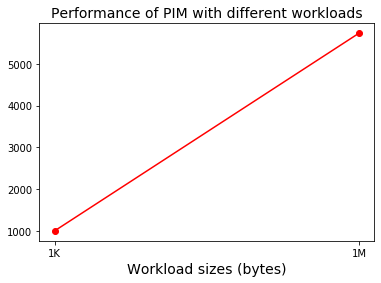

In [16]:
#LINE GRAPHS
workloads = ['1K','1M']
values = []
# values.append()
plt.plot(workloads, pim_list, color='red', marker='o')
plt.title('Performance of PIM with different workloads', fontsize=14)
plt.xlabel('Workload sizes (bytes)', fontsize=14)
# plt.ylabel('Unemployment Rate', fontsize=14)
# plt.grid(True)
plt.show()

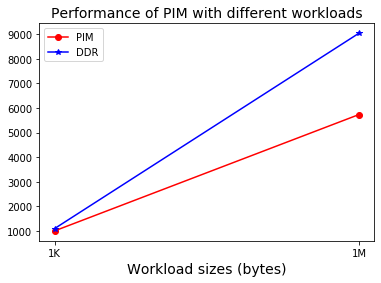

In [17]:
#MULTIPLE LINE GRAPHS
workloads = ['1K','1M']
values = []
# values.append()
plt.plot(workloads, pim_list, color='red', marker='o',label="PIM")
plt.plot(workloads, ddr_list, color='blue', marker='*',label="DDR")
plt.title('Performance of PIM with different workloads', fontsize=14)
plt.xlabel('Workload sizes (bytes)', fontsize=14)
plt.legend()
# plt.ylabel('Unemployment Rate', fontsize=14)
# plt.grid(True)
plt.show()

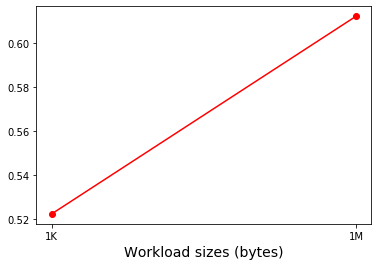

In [26]:
#Percentage improvement line graphs
ratio = []
# ratio.append(data['1K-DDR'][2]/data['1K-PIM'][2])
# ratio.append(data['1M-DDR'][2]/data['1M-PIM'][2])
ratio.append(data['1K-DDR'][2]/(data['1K-PIM'][2]+data['1K-DDR'][2]))
ratio.append(data['1M-DDR'][2]/(data['1M-PIM'][2]+data['1M-DDR'][2]))
plt.plot(workloads, ratio, color='red', marker='o')
plt.title('Percentage of ')
plt.xlabel('Workload sizes (bytes)', fontsize=14)
# plt.legend()
plt.show()